
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 208747287
~~~

~~~
STUDENT GIT LINK: MISSING
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_208747287.html`   




In [24]:
! pip install numpy
! pip install matplotlib


In [25]:
! pip install cProfile


ERROR: Could not find a version that satisfies the requirement cProfile (from versions: none)
ERROR: No matching distribution found for cProfile


In [26]:
! pip install keras 
! pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\LIHI\AppData\Local\Temp\pip-install-ii0o7pfe\pytorch_38936d8578844bcaa9726a5ec1bca715\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


---


Imports:

In [27]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [28]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [29]:
# your_drive_path_to_src_file = "/content/drive/MyDrive/[PATH TO YOUR DIRECTORY WHERE SRC IS IN]]"
# sys.path.append(your_drive_path_to_src_file)


In [30]:
from  src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [31]:
! pip install tensorflow
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



Mini-batch size affects optimization by balancing gradient estimation noise and computational efficiency:

1. **Convergence, variance and performance**:
   - Large batches provide more accurate gradient estimates but can converge to local minima or saddle points, potentially leading to worse generalization and performance
   - Small batches introduce noise which can help escape local minima or saddle points

2. **Hardware utilization**:
   - Large batches utilize hardware efficiently but require more memory and result in slower per-epoch updates
   - Smaller batches may underutilize parallel processing capabilities (e.g., GPUs)

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini-batch SGD requires learning rate scheduling due to noise in gradient estimates from using small, random dataset subsets. This randomness causes gradient direction fluctuations between mini-batches.

**Key considerations**:
- Higher learning rates enable broad parameter space exploration
- Lower learning rates allow precise fine-tuning by reducing noise impact as the model approaches optimal solutions

**Common scheduling strategies**:
1. Step Decay: Reduces learning rate by fixed factor at predetermined intervals
2. Adaptive Methods (e.g., Adam): Automatically adjusts per-parameter learning rates based on historical gradients

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



The increasing variance in mini-batch SGD leads to gradient step fluctuations. While some fluctuation helps avoid local minima and saddle points, excessive variation (gradient explosion) can impede convergence. Batch normalization helps by normalizing intermediate activations, reducing gradient sensitivity to parameter scale and initialization.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



In non-convex optimization, mini-batch SGD typically outperforms full-batch gradient descent because:
- Inherent noise helps escape poor local minima and saddle points
- More frequent updates per epoch improve efficiency and convergence speed
- Full-batch methods may get stuck at saddle points due to gradient averaging

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



When training on imbalanced datasets (e.g., fraud detection), mini-batch SGD faces challenges with minority class representation. Here are key mitigation strategies:

1. **Stratified sampling**:
   - Ensures each mini-batch mirrors the overall dataset's class distribution
   - Maintains proportional representation across classes

2. **Class Weighting**:
   - Adjusts loss function by assigning higher weights to minority classes
   - Weights are typically inversely proportional to class frequency
   - Balances gradient contributions across classes

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


**Training Phase**:
- Focuses on optimizing model performance through loss function minimization
- Smaller mini-batches introduce beneficial noise for regularization
- Helps avoid overfitting to sharp minima

**Inference Phase**:
- No gradient computations needed, reducing memory requirements
- Larger batch sizes maximize hardware parallelism
- Results in improved throughput and reduced latency
- More efficient prediction processing

### Applying mini-batch SGD

Preparing the data:

In [32]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [33]:

def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
    """
    Trains the network using mini-batch gradient descent.

    Parameters:
        x_train : np.array
            Training data.
        y_train : np.array
            Training labels.
        batch_size : int
            Size of each mini-batch.
        epochs : int
            Number of training epochs.
        learning_rate : float
            Learning rate for updating the weights.
    """
    n_samples = len(x_train)
    for epoch in range(epochs):
        shuffle_idx = np.random.permutation(n_samples)
        x_shuffled = x_train[shuffle_idx]
        y_shuffled = y_train[shuffle_idx]
        epoch_error = 0
        n_batches = n_samples // batch_size
        
        # Process mini-batches
        for batch_start in range(0, n_samples, batch_size):
            batch_end = batch_start + batch_size
            x_batch = x_shuffled[batch_start:batch_end]
            y_batch = y_shuffled[batch_start:batch_end]
            
            # Forward pass through all layers
            batch_output = x_batch
            for layer in self.layers:
                batch_output = layer.forward_propagation(batch_output)
            
            # Accumulate batch error
            epoch_error += self.loss(y_batch, batch_output)
            gradient = self.loss_grad(y_batch, batch_output)
            for layer in reversed(self.layers):
                gradient = layer.backward_propagation( gradient, learning_rate,  epoch)
        # Average error over all batches
    epoch_error /= n_batches
    print(f"Training epoch {epoch + 1}/{epochs} - error: {epoch_error:.6f}")

    
def learning_rate_scheduler(self, epoch, initial_lr, decay_rate=0.1, decay_epoch=10, policy = "cosine"):
    """ A simple learning rate scheduler (I added)"""
    warmup_epochs=5
    total_epochs = 10
    if policy == "exponential":
        new_lr = initial_lr * (decay_rate ** (epoch // decay_epoch))
        return new_lr
    if policy == "cosine":
        new_lr = initial_lr * 0.5 * (1 + np.cos(np.pi * epoch / total_epochs))
        return new_lr
    if epoch < warmup_epochs:
        new_lr = initial_lr * (epoch + 1) / warmup_epochs  # Linear warm-up
    else:
        new_lr = initial_lr * (decay_rate ** ((epoch - warmup_epochs) // decay_epoch))
    return new_lr


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [34]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.041546
Training epoch 2/10   error=0.023690
Training epoch 3/10   error=0.018432
Training epoch 4/10   error=0.015449
Training epoch 5/10   error=0.013457
Training epoch 6/10   error=0.011986
Training epoch 7/10   error=0.010815
Training epoch 8/10   error=0.009838
Training epoch 9/10   error=0.009006
Training epoch 10/10   error=0.008291
Total process time: 35.091


In [35]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0117, Accuracy: 9369/10000 (94%)



In [36]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

In [37]:
from  src import *


In [38]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()
netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training epoch 10/10 - error: 0.059286
Total process time: 6.527


In [39]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0597, Accuracy: 7326/10000 (73%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

ANSWER.      
1 ** Training speed **:
    - Mini-batch implementation achieved faster training time.
        - this is due to the quicker convergence compared to single-sample training.

2 ** Lower training error **
    - Mini-batch implementation showed better  training error metrics
        -More stable gradient updates led to improved learning dynamics
3 ** better test accuracy **
    Despite efficiency advantages, mini-batch training showed lower generalization performance in this specific case.
    - GD - test accuracy 94%.
    - NetMiniGD - test accuracy 74%. (this counterintuitive result)

    Several factors could explain it explain:
    - The implementation used a basic optimization method without normalization.
    - Non-monotonic convergence of training errors was observed in mini-batch training, possibly due to increased sensitivity to individual batch errors.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [40]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [42]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [43]:

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        self.filters = np.random.randn(num_filters, 1, self.size, self.size) * 0.1
        # filters_convolution = (num_filters,in_channels,filter_height,filter_width)
        # in_channels = grayscale becase its 1 

    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

         # Slide over each valid (size x size) patch
        for y in range(0, h - self.size + 1, self.stride):
            for x in range(0, w - self.size + 1, self.stride):
                 # Extract the patch of shape (ch, size, size)
                 # moving the patch around 
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        """
        Forward pass of the convolution layer.
        image shape can be (height, width) for grayscale or (channels, height, width).
        If 2D, we expand dims to (1, height, width).
        """
        # If single-channel 2D image, reshape to (1, h, w)
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=0)

        # Keep for backprop
        self.last_input = image

        # Determine output shape
        c, h, w = image.shape  # c=1 for MNIST
        out_h = h - self.size + 1  # because stride=1, no padding
        out_w = w - self.size + 1

        # Initialize output
        output = np.zeros((self.filters.shape[0], out_h, out_w))

        # Convolve each filter over the input
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                # patch shape:  (c, size, size)
                # filter shape: (c, size, size)
                output[f, y, x] = np.sum(patch * self.filters[f])

        # If an activation function is specified (e.g., ReLU),
        # apply it here (simple approach).
        if self.activation is not None:
            output = self.activation.forward_propagation(output)

        return output
    

    def backward_propagation(self, grad_out, learning_rate):
         # 1. Backprop through activation (if any)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out, learning_rate)
            
        # 2. Initialize gradients
        c, h, w = self.last_input.shape
        grad_in = np.zeros_like(self.last_input)     # gradient wrt input
        grad_filter = np.zeros_like(self.filters)    # gradient wrt filters

        # 3. Accumulate gradients
        num_filters = self.filters.shape[0]
        for f in range(num_filters):
            for patch, y, x in self.patch_generator(self.last_input):
                # The gradient for the filter is the input patch multiplied
                # by the scalar gradient coming through that output pixel.
                grad_filter[f] += grad_out[f, y, x] * patch

                # The gradient wrt input is the filter multiplied by the scalar gradient
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f]

        # 4. Update the filters via SGD
        self.filters -= learning_rate * grad_filter

        return grad_in


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [44]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

         # Slide over each valid (size x size) patch
        for y in range(0, h - self.size + 1, self.stride):
            for x in range(0, w - self.size + 1, self.stride):
                 # Extract the patch of shape (ch, size, size)
                 # moving the patch around 
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x

    def forward_propagation(self, image):
        self.last_input = image

        ch,h,w = image.shape
        H_out = int(1 + (h - self.size) / self.stride)
        W_out = int(1 + (w - self.size) / self.stride)

        out = np.zeros((ch, H_out, W_out))

         # For each channel, slide the pooling window
        for channel in range(ch):
            for out_y in range(H_out):
                for out_x in range(W_out):
                    # Calculate the top-left corner of the patch
                    start_y = out_y * self.stride
                    start_x = out_x * self.stride

                    # Slice out the patch (size x size)
                    patch = image[channel,
                                  start_y:start_y + self.size,
                                  start_x:start_x + self.size]
 
                    out[channel, out_y, out_x] = np.max(patch)

        return out

    def backward_propagation(self, grad_out, learning_rate):
        grad_in = np.zeros_like(self.last_input)
        c, h, w = self.last_input.shape
        out_h, out_w = grad_out.shape[1], grad_out.shape[2]

        # For each channel and each output cell, find where the max came from.
        for channel in range(c):
            for out_y in range(out_h):
                for out_x in range(out_w):
                    # Coordinates in the input
                    start_y = out_y * self.stride
                    start_x = out_x * self.stride

                    # Patch that was maxed
                    patch = self.last_input[channel,
                                            start_y:start_y + self.size,
                                            start_x:start_x + self.size]

                    # Find the (row, col) within this patch that was the maximum
                    (max_y, max_x) = np.unravel_index(np.argmax(patch), patch.shape)

                    # Propagate the gradient from grad_out to the location of the max
                    grad_in[channel, start_y + max_y, start_x + max_x] += grad_out[channel, out_y, out_x]
        return grad_in
    


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [45]:
import numpy as np

class Reshape:
    def __init__(self, input_shape, output_shape):
        """
        input_shape: tuple indicating the shape of the data before reshape
        output_shape: tuple indicating the desired new shape
        """
        self.input_shape  = input_shape
        self.output_shape = output_shape

    def forward_propagation(self, input_data):
        """
        Forward pass: Reshapes the input_data from self.input_shape to self.output_shape.
        """
        return np.reshape(input_data, self.output_shape)

    def backward_propagation(self, output_gradient, learning_rate):
        """
        Backward pass: Reshapes the gradient from the output shape back to the input shape.
        `learning_rate` is unused here, because this layer has no learnable parameters.
        """
        return np.reshape(output_gradient, self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  

In [46]:
C_in, H_in, W_in = (12, 28, 28)
padding = 0
print(f"Input Shape: {(C_in, H_in, W_in)}")

# Step 1: Convolution layer
kernel_size = 3, stride = 1
H_out = (H_in  - kernel_size) // stride + 1
W_out = (W_in  - kernel_size) // stride + 1
print(f"After Convolution: {C_in, H_out, W_out}")

# Step 2: Max-pooling layer
pool_size = 3
C_in, H_in, W_in = (12, H_out, W_out)
H_out = (H_out  - pool_size) // stride + 1
W_out = (W_out  - pool_size) // stride + 1
print(f"after maxpool:{C_in, H_in, W_in}")

# Step 3: Reshape for affine layer
reshaped_dim = C_in * H_out * W_out
print(f"Reshaped for Affine Layer: ({reshaped_dim},)")


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (440636886.py, line 6)

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [30]:
# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
c = 12 # filters 
x_new =  24 # 26 after first maxpool, 24 after second
y_new = 24

# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3, activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# # CNNnet.add(ActivationLayer(relu, relu_grad))
# # CNNnet.add(ActivationLayer(tanh, tanh_grad))
# # CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [31]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 8 # changed from 20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.067205
Training epoch 2/20   error=0.042687
Training epoch 3/20   error=0.036376
Training epoch 4/20   error=0.031722
Training epoch 5/20   error=0.027849
Training epoch 6/20   error=0.024496
Training epoch 7/20   error=0.021562
Training epoch 8/20   error=0.019029
Training epoch 9/20   error=0.016829
Training epoch 10/20   error=0.014905


KeyboardInterrupt: 

Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [32]:


CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.012860
Training epoch 2/4   error=0.009561
Training epoch 3/4   error=0.007646
Training epoch 4/4   error=0.006386
         62434562 function calls in 89.762 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      400    0.001    0.000    0.006    0.000 2389469911.py:12(forward_propagation)
      400    0.001    0.000    0.006    0.000 2389469911.py:19(backward_propagation)
  6499200    3.365    0.000    3.365    0.000 4286984960.py:21(patch_generator)
      400    9.766    0.024   26.219    0.066 4286984960.py:37(forward_propagation)
      400   26.202    0.066   27.865    0.070 4286984960.py:74(backward_propagation)
      400    3.300    0.008   14.985    0.037 876595613.py:25(forward_propagation)
      400   10.732    0.027   18.439    0.046 876595613.py:51(backward_propagation)
        1    0.000    0.000   89.762   89.762 <string>:1(<module>)
      400    0.005    0.0

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

**Our CNN implementation is slow**
The running time of our CNN is primarily determined by the number of operations performed during the forward and backward passes:
- The forward pass includes: 
    - convolutions:
        - O(height x width x channels x n_filters x filter_dimensions)
    
    - fully connected operations:
        - if the layer has N neurons, and the previous layer has M outputs : O(N×M).
    - pooling:
        - contribution to running time is relatively low

- The backward pass includes: 
  - gradient computations



### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [33]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0278, Accuracy: 458/500 (92%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [34]:
!pip install torch


In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [36]:
#Applying squeeze(1) reduces the shape to (num_samples,), which is the correct format for classification tasks.
t_train = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train).squeeze(1))  
t_test = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test).squeeze(1))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [37]:

class PyTorchCNN(nn.Module):
    def __init__(self):
        """
        Initialize the CNN architecture.
        """
        super(PyTorchCNN, self).__init__()
        
        # Input size (channels, height, width) and number of classes
        input_size = (1, 28, 28)  # For MNIST dataset
        num_classes = 10          # Digits 0-9
        num_filters = 12          # Number of filters in convolutional layer
        kernel_size = 3           # Kernel size for convolution and pooling
        stride_conv = 1           # Stride for convolution and pooling
        
        # Convolutional Layer
        self.conv = nn.Conv2d(
            in_channels=1,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=stride_conv,
            padding=0  # No padding
        )
        
        # Max Pooling Layer
        self.max_pool = nn.MaxPool2d(kernel_size=3, stride=stride_conv, padding=0)
        
        # Compute size after convolution and pooling
        h_after_conv = self.size_after_conv_layer(input_size[1], kernel_size, stride_conv)
        w_after_conv = self.size_after_conv_layer(input_size[2], kernel_size, stride_conv)
        h_after_pool = self.size_after_conv_layer(h_after_conv, kernel_size, stride_conv)
        w_after_pool = self.size_after_conv_layer(w_after_conv, kernel_size, stride_conv)
        
        # Flattened size for fully connected layers
        self.flattened_size = num_filters * h_after_pool * w_after_pool
        # print(f"Flattened size: {self.flattened_size}")

        # Fully connected layers
        self.fc1 = nn.Linear(self.flattened_size, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)                   # Second fully connected layer
        self.fc3 = nn.Linear(64, num_classes)           # Output layer

    @staticmethod
    def size_after_conv_layer(input_size, kernel_size, stride):
        """
        Calculate the output size after applying a convolution or pooling layer.

        Args:
            input_size (int): Size of the input dimension (height or width).
            kernel_size (int): Size of the kernel.
            stride (int): Stride of the operation.

        Returns:
            int: Size of the output dimension after the operation.
        """
        return (input_size - kernel_size) // stride + 1

    def forward(self, x):
        """
        Define the forward pass of the CNN.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

        Returns:
            torch.Tensor: Output logits.
        """
        x = F.relu(self.conv(x))  
        x = self.max_pool(x)
        x = x.view(x.size(0), -1)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.tanh(self.fc3(x))  
        
        return x  

In [38]:

# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0116
Epoch [2/10], Step [500/938], Loss: 0.0061
Epoch [3/10], Step [500/938], Loss: 0.0089
Epoch [4/10], Step [500/938], Loss: 0.0083
Epoch [5/10], Step [500/938], Loss: 0.0099
Epoch [6/10], Step [500/938], Loss: 0.0060
Epoch [7/10], Step [500/938], Loss: 0.0043
Epoch [8/10], Step [500/938], Loss: 0.0147
Epoch [9/10], Step [500/938], Loss: 0.0089
Epoch [10/10], Step [500/938], Loss: 0.0105


Evaluation:

In [39]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0001, Accuracy: 9558/10000 (96%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

### **PyTorch Performance**  
PyTorch was **better and faster**, thanks to its **resource management** and **efficient computations**. It performed well even without using its advanced GPU support and could have worked even faster when distributed.

### **Network Architecture**  
- **Loss fluctuations** suggest the need for **batch normalization** or **dropout layers** to stabilize training.  
- A **train-test performance gap** indicates **overfitting**, which could be addressed by **removing unnecessary layers**.  
- We also didn’t try **adding multiple filters**, which could help capture more diverse features.

### **Improving the Solution Algorithm**  
- We didn’t explore **data-focused techniques** 
    - **Data augmentation** which could improve generalization.  
    - **Curriculum learning** which could lead to faster convergence and better performence. 
- The optimization was **basic**, and improvements could include adding **learning rate schedules** for smoother training.  


---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

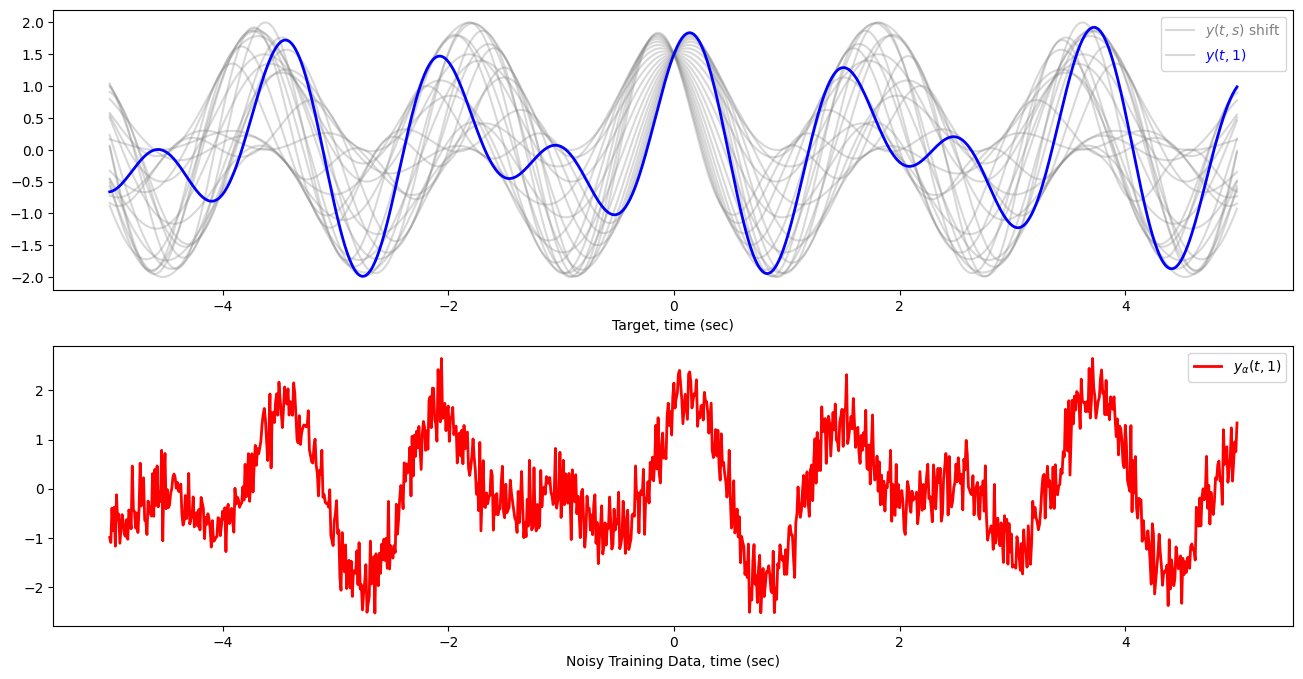

In [58]:
## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
y_func =  lambda s: np.sin(np.sin(s ) * 2 *np.pi* t_line + np.pi/6)+ np.cos(2*t_line * np.sqrt(3))
y = y_func(1)

## Adding noise
noise_vector = np.random.normal(0, 1, len(t_line)) * alpha
y_noisy = y_func(1) + noise_vector

## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [59]:
from torch import  nn
import torch

class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [60]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=3, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [61]:
# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

y_func = lambda s,t_line:np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi/6) + np.cos(2 * np.sqrt(3) * t_line)

In [62]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


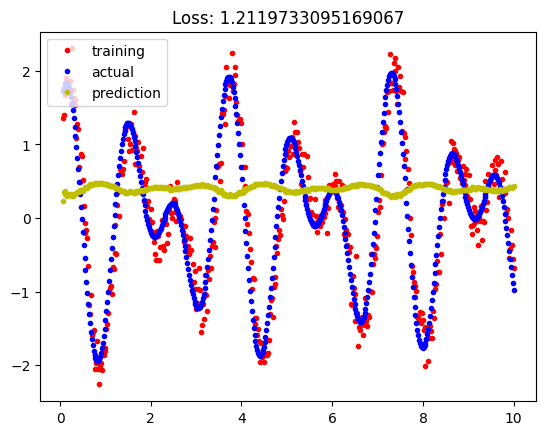

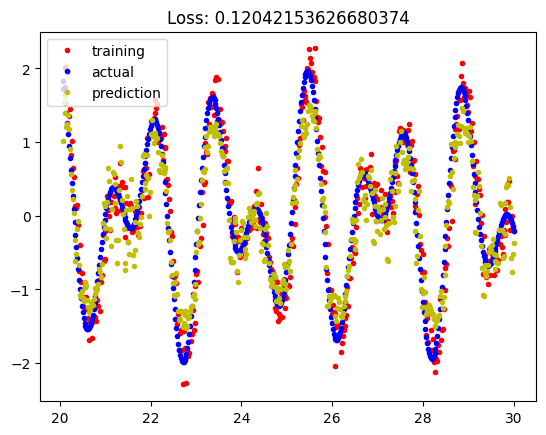

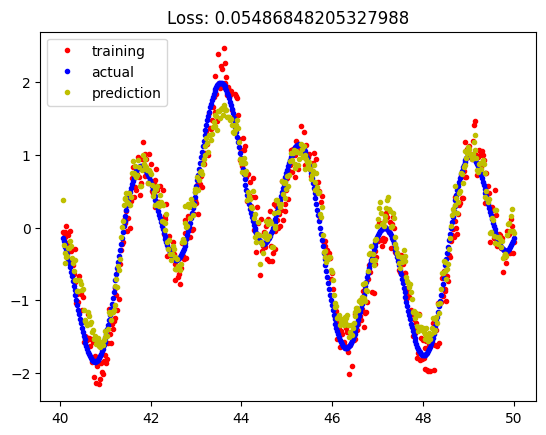

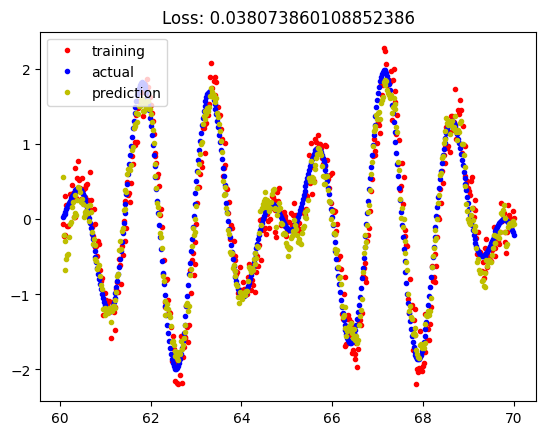

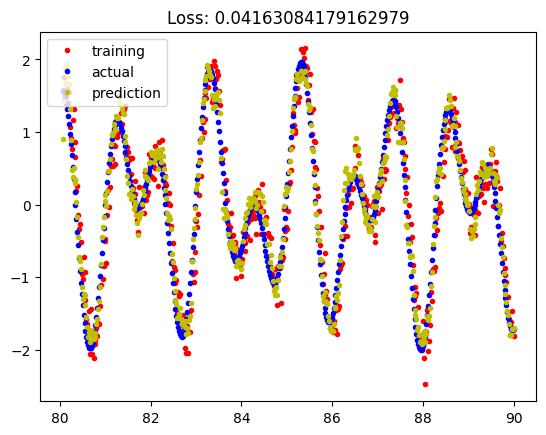

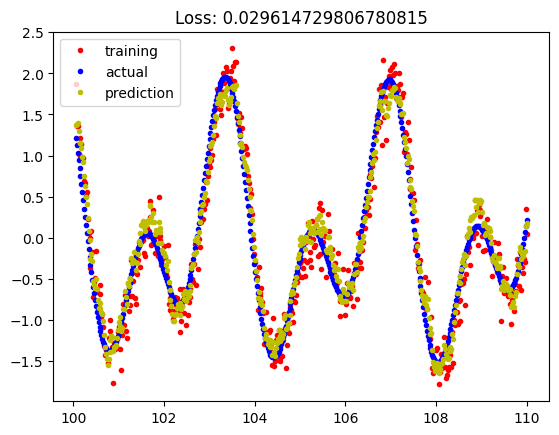

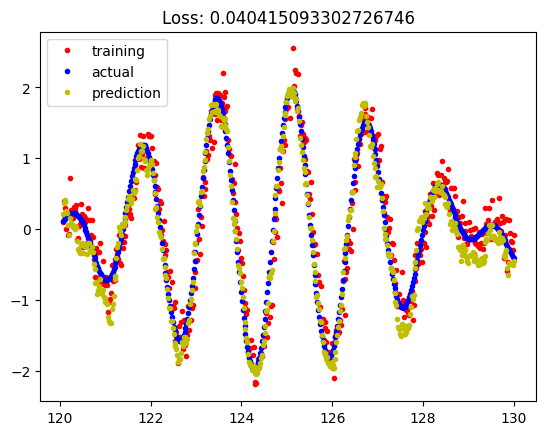

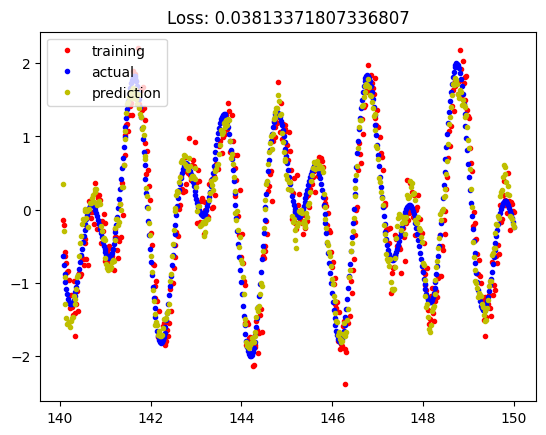

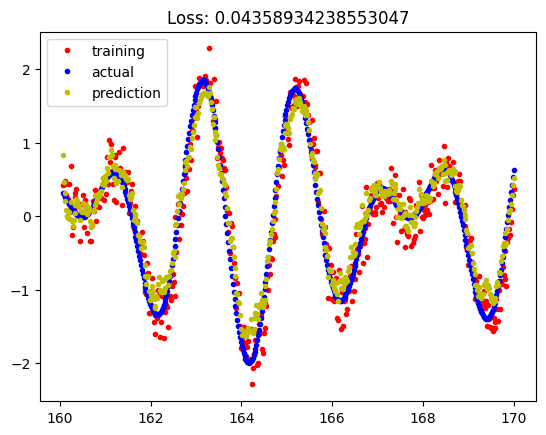

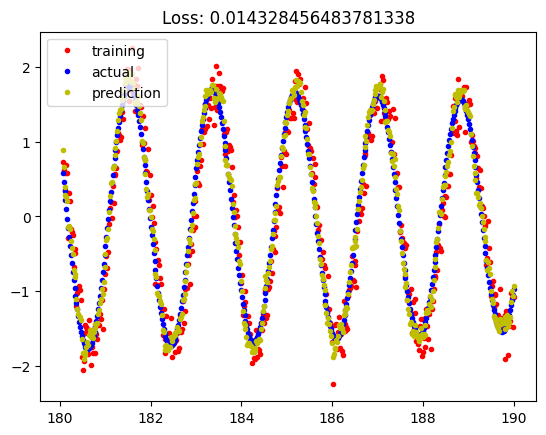

In [63]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

Write your solution here!

**a)** The model performs well - the loss decreases over the iterations and the predictions seem to fit the stracture of the data (not noise) 

**b)** 
Relationships between hyperparameters and RNN model:
- **n_steps** = The loss decreases over the n_steps
- **lag** = Lag should align with the seasonality of the data to ensure that the model captures meaningful temporal relationships between the input (training sequence) and the output (target sequence).
- **alpha** = As we add more noise it becomes more challangeing for the model to learn the real signal as predicting correctly requires more generalization.
- **seq_length**= Determines how much context the RNN can use during training.
- **stride** = the window size of the function (of which the seq_length will be divided).

**c)** Predict energy usage based on historical consumption with daily and seasonal patterns.

**d)** overall the results are good.

**to reduce computational complexity:**
i would look into learning rates of the optimization method.

**to increase accuracy:**
Adding a layer, adding internal hyperparameters for each layer.
        Ive tested both and they seem to improve performence.



THE END!